# Discussion Forum data analysis

In [1]:
import json
import operator
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path

## Load data

In [2]:
dataTitle = []
dataHouse = json.load(open('houseplantsNew.json', 'r'))
for key, value in dataHouse.items():
    dataTitle.append(value["Title"])
dataIndoor = json.load(open('IndoorGardenNew.json', 'r'))
for key, value in dataIndoor.items():
    dataTitle.append(value["Title"])
titleNum = len(dataTitle)
print("Total number of new posts:", titleNum)

Total number of new posts: 1759


## Find out how many times participants ask for help in identifying a plant. 

In [3]:
possibleTitle = []
for i in range(titleNum):
    if ("what" in dataTitle[i].lower()) or ("know" in dataTitle[i].lower()) or ("identi" in dataTitle[i].lower()):
        possibleTitle.append(dataTitle[i])    
print("All possible titles: ", len(possibleTitle), "\n".join(possibleTitle), sep="\n")

All possible titles: 
267
What’s causing yellowing on my new anthurium?
What is growing in my Parlour Palm pot?
Wow what a bargain 😍
Help!!! I accidentally broke my ZZ plant. I’ve struggled to grow it for an entire year. Any suggestions what I can do to save it?
Anyone know what this dried flower/plant is?
Does anyone know how to allow chrysanthemums to grow every year?
Help please! This was unlabeled at the store. My app identified it as “Joseph’s Coat” so I’ve been trying to care for it as such - he’s struggling though off and on so I suspected maybe that wasn’t right. So googled Joseph’s Coat and yeah that’s so not this ... anyone know it’s true name? TIA!!
fern kinda thing ( no clue what he is ) and hopefully it survives ...Christmas cactus is a happy girl!
I've prune my heathers!! ✂️ I really don't know what I was doing but I did it anyway 😅 In a few months I will know if I did it well or not. (Last 📸 are the before pictures)
What’s happening to my ponytail palm?? I water once eve

## After inspecting the list manually, we have 79 posts (4.49%) asked for help in identifying a plant.

In [4]:
posts= []
with open("posts.txt", 'r',encoding="utf8") as f:
    for line in f:
        posts.append(line)
print("Number of posts asked for help in identifying a plant: ", len(posts), "(", 100*len(posts)/titleNum, "%)")
print("\n","\n".join(posts))

Number of posts asked for help in identifying a plant:  79 ( 4.491188175099488 %)

 What is growing in my Parlour Palm pot?

Anyone know what this dried flower/plant is?

Help please! This was unlabeled at the store. My app identified it as “Joseph’s Coat” so I’ve been trying to care for it as such - he’s struggling though off and on so I suspected maybe that wasn’t right. So googled Joseph’s Coat and yeah that’s so not this ... anyone know it’s true name? TIA!!

Anyone know what this is?

Found this baby in the trash 😩 — what is she?

Hi! Can anyone tell me what kind of plant this is? The tag just says pilea.

what type of plant is this? at first i thought it was a schefflera but i thought scheffleras had trunks

Does anyone know what this plant is called?? I’m guessing its some type of Algaonema but not sure... thanks for your help in advance!

WHAT in the world is this???

Received this plant when my dad passed away and not sure what it is! I have two puppies and a baby and want to 

## Word cloud of our posts

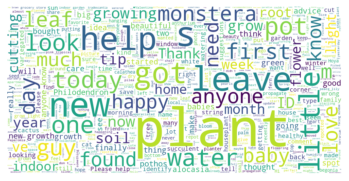

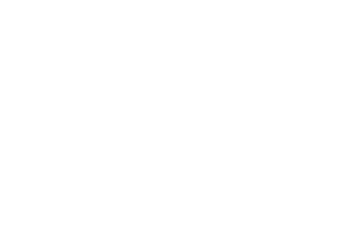

In [7]:
titleString = ''.join(dataTitle)
# #wordcloud = WordCloud().generate(titleString)
# #plt.imshow(wordcloud, interpolation='bilinear')
# #plt.axis("off")
# wordcloud = WordCloud(max_font_size=40).generate(titleString)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "leaf.png")))
stopwords = set(STOPWORDS)
stopwords.add("said")
wc = WordCloud(background_color="white", max_words=2000, mask=mask,stopwords=stopwords,
               contour_width=3, contour_color='steelblue')
wc.generate(titleString)
wc.to_file(path.join(d, "leaf_word_cloud.png"))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
#plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()